In [42]:
# Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('/home/gerri/Documents/ShareFiles/Data Files/Student Mental health.csv')

In [98]:
# exploring the first 5 rows

df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Exploratory Data Analysis (EDA)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [100]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 101 rows and 11 columns


In [101]:
# Missing values exploration

df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [102]:
df['Age'].value_counts()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64

In [103]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [104]:
# check to make sure replacing is successful

df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [105]:
# Unifying the values in column 'Your current year of Study'

df['Your current year of Study'].value_counts()

Your current year of Study
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

In [106]:
# Converting categories into numerical data

df['Your current year of Study'] = df['Your current year of Study'].replace(['Year 1', 'year 1', 'Year 2', 'year 2', 'Year 3', 'year 3', 'year 4'], [1, 1, 2, 2, 3, 3, 4])

In [107]:
# check to make sure replacing is successful

df['Your current year of Study'].value_counts()

Your current year of Study
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [108]:
# Review the course of students to unify them

df['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [109]:
course_mapping = {
    'engineering': 'Engineering',
    'islamic education': 'Islamic Education',
    'bit': 'BIT',
    'laws': 'Law',
    'mathemathics': 'Mathematics',
    'pendidikan islam': 'Islamic Education',
    'bcs': 'BCS',
    'human resources': 'Human Resources',
    'irkhs': 'IRKHS',
    'psychology': 'Psychology',
    'kenms': 'KENMS',
    'accounting': 'Accounting',
    'enm': 'ENM',
    'marine science': 'Marine Science',
    'koe': 'KOE',
    'banking studies': 'Banking Studies',
    'business administration': 'Business Administration',
    'kirkhs': 'KIRKHS',
    'usuluddin': 'Usuluddin',
    'taasl': 'TAASL',
    'engine': 'Engineering',
    'ala': 'ALA',
    'biomedical science': 'Biomedical Science',
    'benl': 'BENL',
    'it': 'IT',
    'cts': 'CTS',
    'econs': 'Economics',
    'mhsc': 'MHSC',
    'malcom': 'MALCOM',
    'kop': 'KOP',
    'human sciences': 'Human Sciences',
    'biotechnology': 'Biotechnology',
    'communication': 'Communication',
    'diploma nursing': 'Diploma Nursing',
    'pendidikan islam': 'Islamic Education',
    'radiography': 'Radiography',
    'fiqh fatwa': 'Fiqh Fatwa',
    'diploma tesl': 'Diploma TESL',
    'fiqh': 'Fiqh',
    'nursing': 'Nursing',
}

# There are multiple entries of the same course with different spelling

df['What is your course?'] = df['What is your course?'].str.lower().str.strip().map(course_mapping)

In [110]:
# check if remapping was successful

df['What is your course?'].unique()

array(['Engineering', 'Islamic Education', 'BIT', 'Law', 'Mathematics',
       'BCS', 'Human Resources', 'IRKHS', 'Psychology', 'KENMS',
       'Accounting', 'ENM', 'Marine Science', 'KOE', 'Banking Studies',
       'Business Administration', nan, 'KIRKHS', 'Usuluddin', 'TAASL',
       'ALA', 'Biomedical Science', 'BENL', 'IT', 'CTS', 'Economics',
       'MHSC', 'MALCOM', 'KOP', 'Human Sciences', 'Biotechnology',
       'Communication', 'Diploma Nursing', 'Radiography', 'Fiqh Fatwa',
       'Diploma TESL', 'Fiqh', 'Nursing'], dtype=object)

In [111]:
# Renaming columns for more readability

df.columns = ['Timestamp','Gender','Age','Course','Year of Study','CGPA','Marital Status','Depression','Anxiety','Panic Attacks','Treatment']

In [112]:
# Renaming check 

df.head()

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital Status,Depression,Anxiety,Panic Attacks,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathematics,4,3.00 - 3.49,No,No,No,No,No


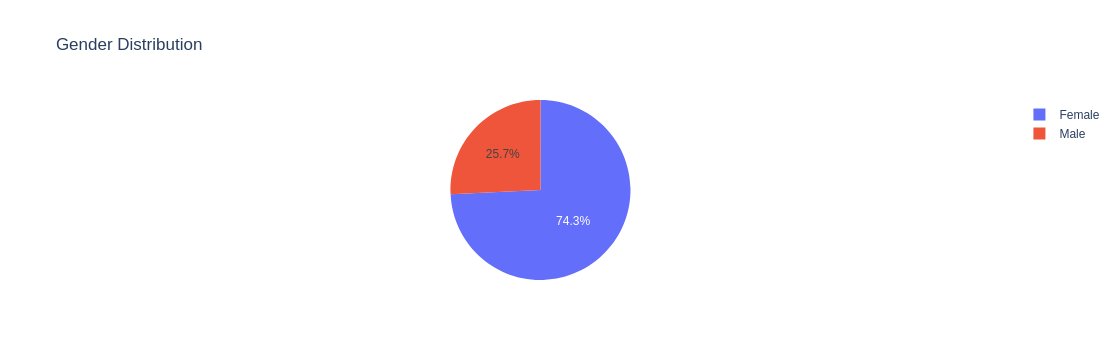

In [113]:
# Gender analysis

plt = px.pie(df, names='Gender', title='Gender Distribution')

plt.show()

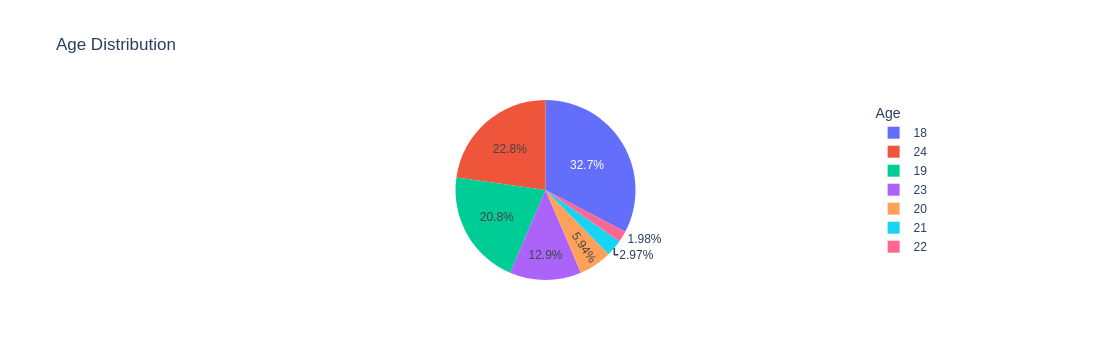

In [114]:
# Age analysis

plt = px.pie(df, names='Age', title='Age Distribution')
plt.update_legends(title_text='Age')
plt.show()

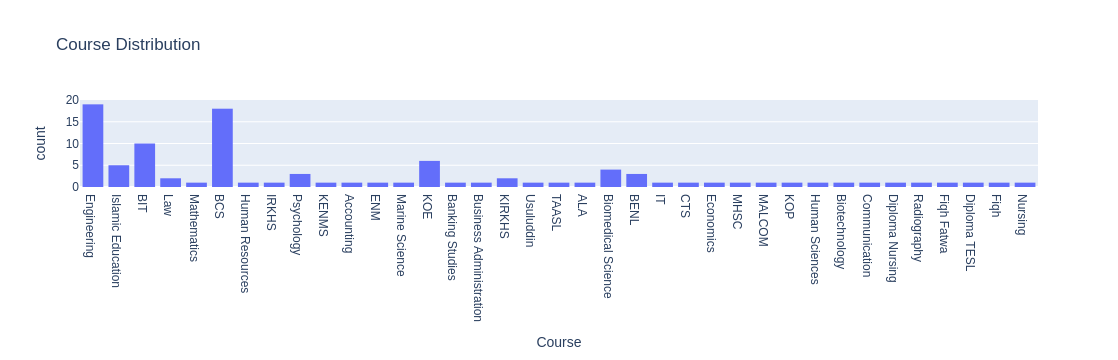

In [115]:
# Course Analysis

plt = px.histogram(df, x='Course', title = 'Course Distribution')
plt.show()

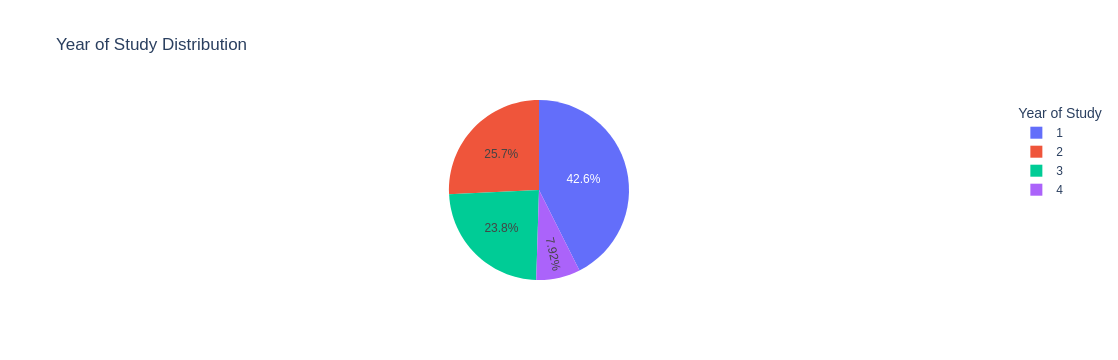

In [116]:
# Year of Study analysis

plt = px.pie(df, names='Year of Study', title='Year of Study Distribution')
plt.update_annotations(textposition='outside')
plt.update_legends(title_text='Year of Study')
plt.show()

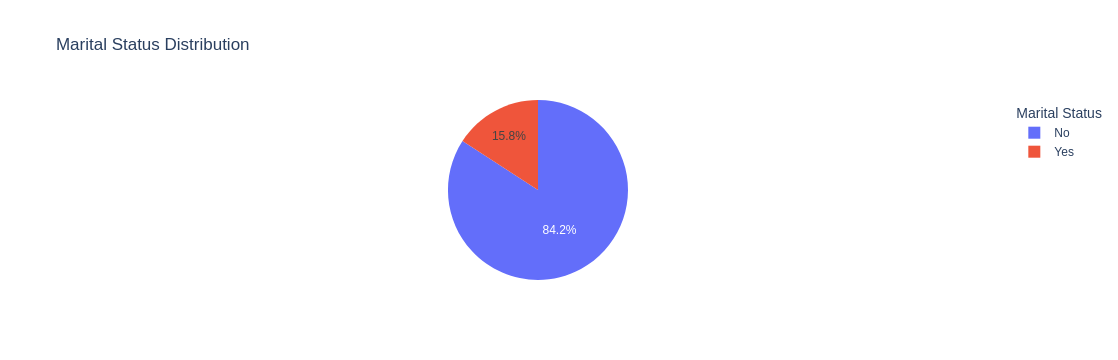

In [117]:
# Marital Status Analysis

plt = px.pie(df, names='Marital Status', title='Marital Status Distribution')
plt.update_annotations(textposition='outside')
plt.update_legends(title_text='Marital Status')
plt.show()

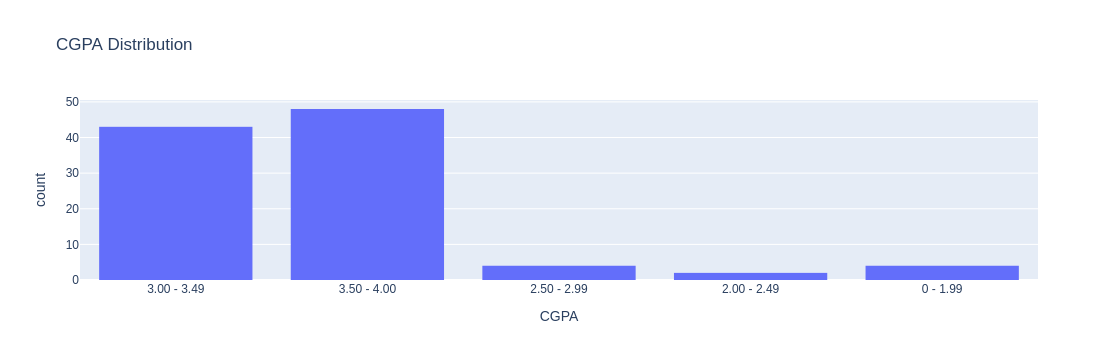

In [118]:
# CGPA Analysis

plt = px.histogram(df, x='CGPA', title='CGPA Distribution')
plt.show()

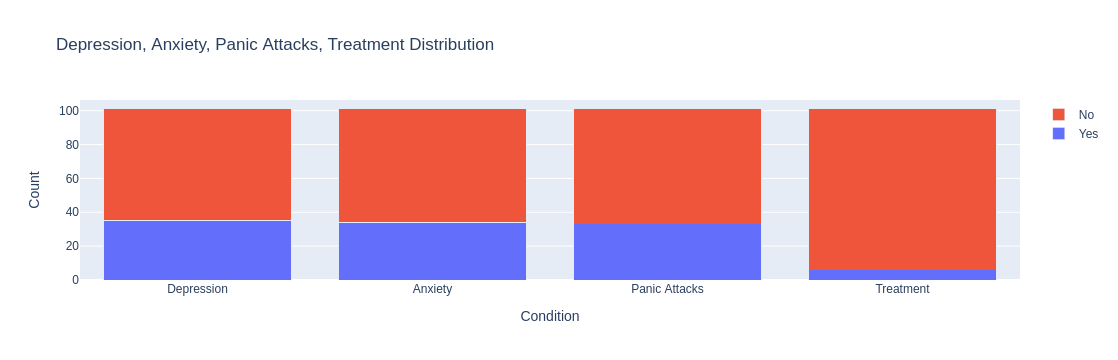

In [119]:
# Depression, Anxiety, Panic Attacks and Treatment Analysis

# Select only the specific columns
df_new = df[['Depression', 'Anxiety', 'Panic Attacks', 'Treatment']]

# convert  all values to strings
df_new = df_new.astype(str)

# Count responses for each column
counts = df_new.apply(lambda x: x.value_counts()).fillna(0)

# Define the plot

fig = go.Figure(data=[
    go.Bar(name='Yes', x=counts.columns, y=counts.loc['Yes']),
    go.Bar(name='No', x=counts.columns, y=counts.loc['No'])
])

# Change to stack barchart

fig.update_layout(barmode='stack', title='Depression, Anxiety, Panic Attacks, Treatment Distribution', 
                  xaxis_title='Condition', yaxis_title='Count')

fig.show()

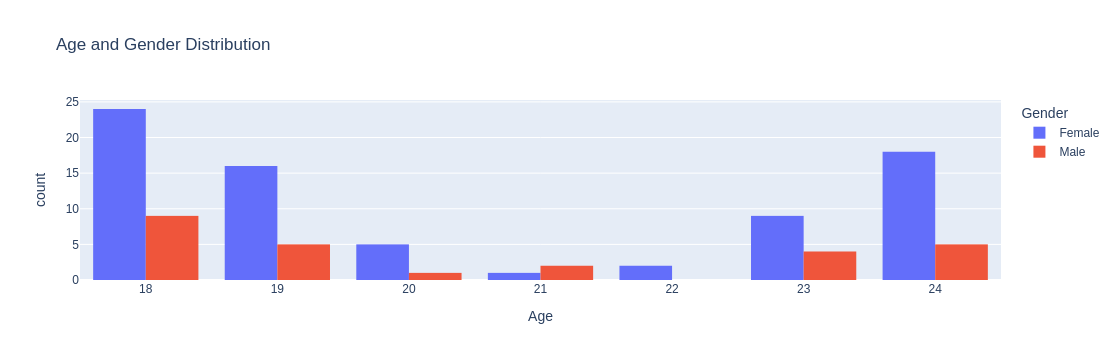

In [120]:
# Age and Gender relation

plt = px.histogram(df, x='Age', color='Gender', barmode='group', title='Age and Gender Distribution')
plt.show()

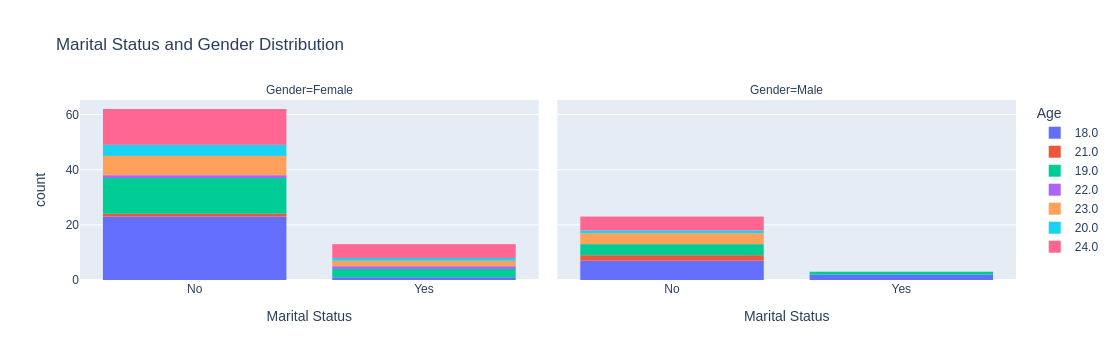

In [121]:
# Age, Gender and Marital Status relation
fig = px.histogram(df, x='Marital Status', color='Age', facet_col='Gender', title='Marital Status and Gender Distribution')

fig.show()

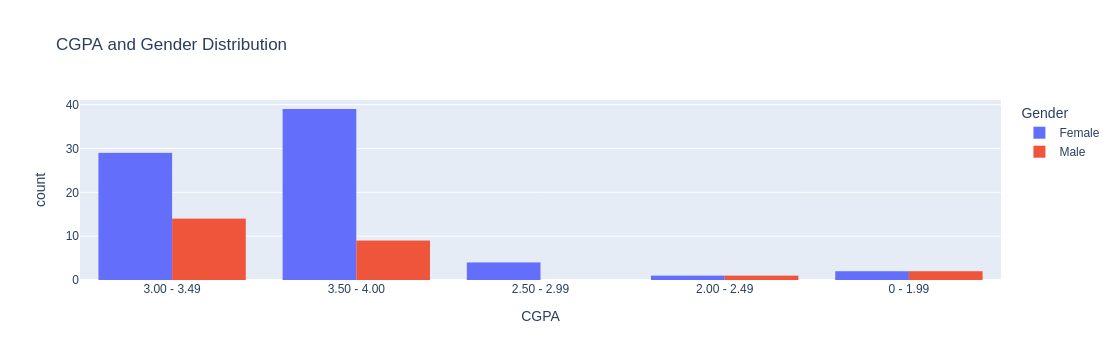

In [122]:
# Gender and CGPA relation

plt = px.histogram(df, x='CGPA', color='Gender', barmode='group', title='CGPA and Gender Distribution')
plt.show()

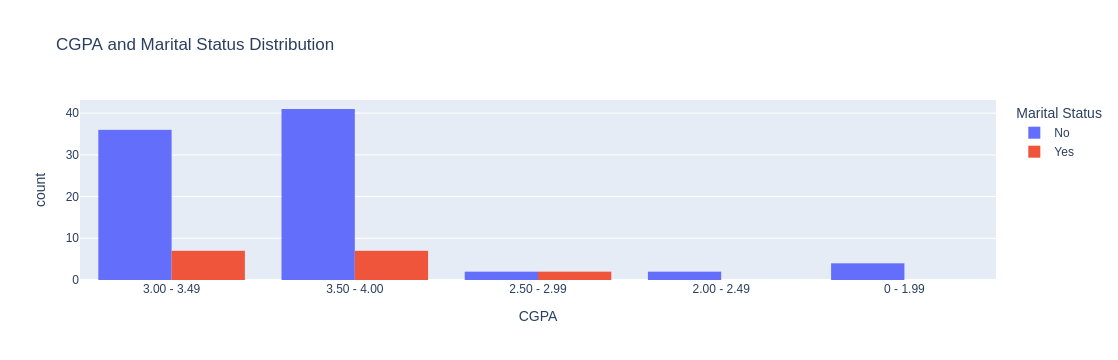

In [123]:
# Relation between marital status and CGPA

plt = px.histogram(df, x='CGPA', color='Marital Status', barmode='group', title='CGPA and Marital Status Distribution')
plt.show()

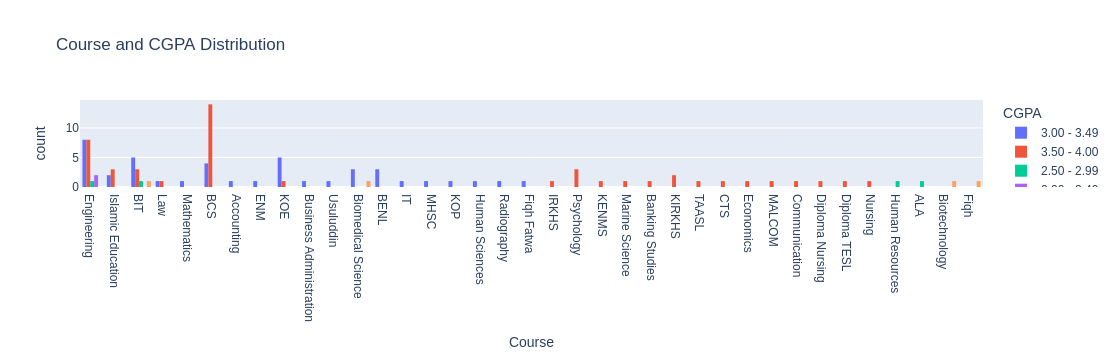

In [124]:
# CGPA vs Course

plt = px.histogram(df, x='Course', color='CGPA', barmode='group', title='Course and CGPA Distribution')
plt.show()

In [125]:
# Function to convert string range to a midpoint value
def convert_range_to_midpoint(cgpa_range):
    lower, upper = map(float, cgpa_range.split(' - '))
    return (lower + upper) / 2

# Convert CGPA string ranges to midpoint values
df['CGPA_New'] = df['CGPA'].apply(convert_range_to_midpoint)

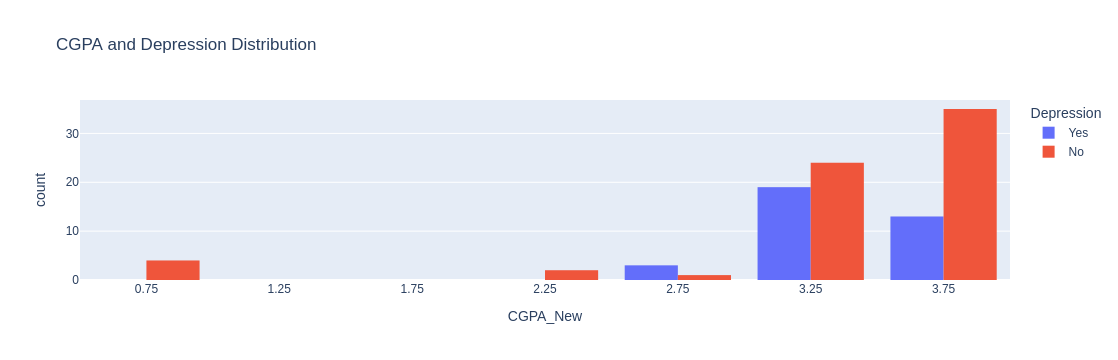

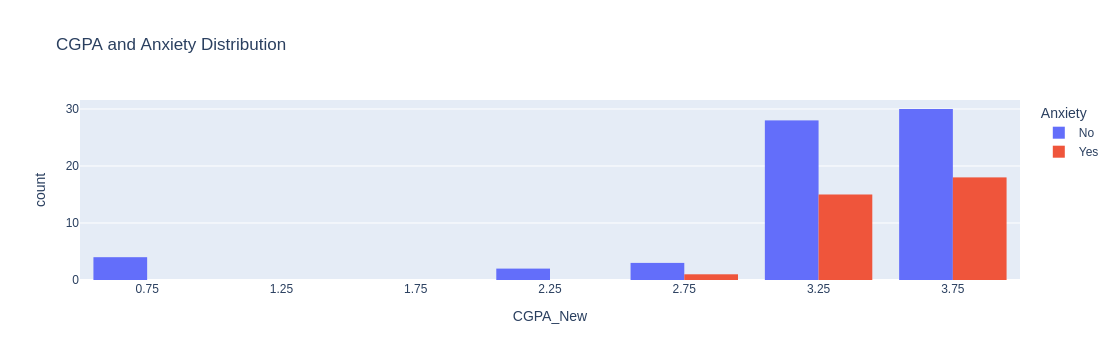

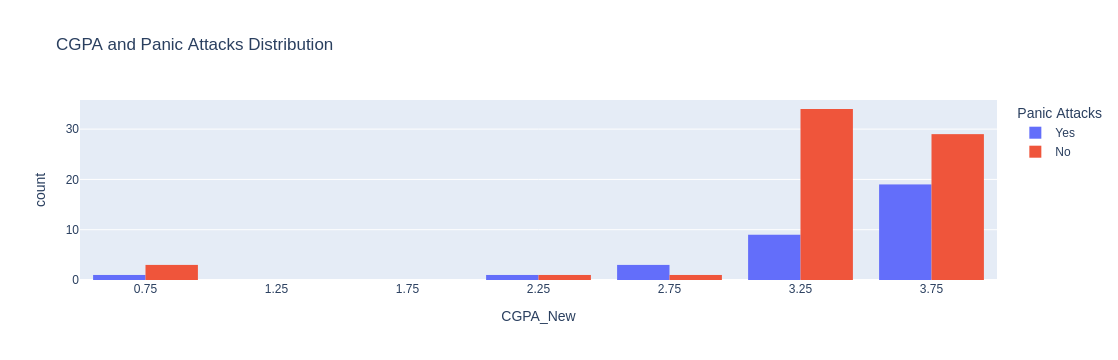

In [126]:
# Relation between CGPA and Depression, Anxiety, Panic Attacks
plt = px.histogram(df, x='CGPA_New', color='Depression', barmode='group', title='CGPA and Depression Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_New', color='Anxiety', barmode='group', title='CGPA and Anxiety Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_New', color='Panic Attacks', barmode='group', title='CGPA and Panic Attacks Distribution')
plt.show()

In [127]:
# Define a function to convert 'Yes' to 1 and 'No' to 0
def convert_binary(value):
    if value == 'Yes':
        return 1
    elif value == 'No':
        return 0
    else:
        return value

# Convert 'Depression', 'Anxiety', and 'Panic Attack' columns in a binary form
df['Depression_Binary'] = df['Depression'].map(convert_binary)
df['Anxiety_Binary'] = df['Anxiety'].map(convert_binary)
df['Panic Attacks_Binary'] = df['Panic Attacks'].map(convert_binary)

In [128]:
# Calculate the correlation matrix
correlation_matrix = df[['CGPA_New', 'Depression_Binary', 'Anxiety_Binary', 'Panic Attacks_Binary']].corr()

# Print the correlation matrix
correlation_matrix

,CGPA_New,Depression_Binary,Anxiety_Binary,Panic Attacks_Binary
CGPA_New,1.000000,0.041807,0.172950,0.042511
Depression_Binary,0.041807,1.000000,0.273764,0.246842
Anxiety_Binary,0.172950,0.273764,1.000000,0.084478
Panic Attacks_Binary,0.042511,0.246842,0.084478,1.000000
